# Classification of Nodules in CT Scans
This is the first notebook about the classification of nodules in CT scans. A CT scan is a 3D dataset that contains an indexed collection of images in which each image represent a slice of a body of part of it. The complete data is divided in 10 subsets and each subset contains a set of CT scans. The data format used for the CT scan is DICOM. Each subset contains 90 CT scans. Each CT scan is composed of the raw data (file name extension .raw) and its metadata (file name extension .mhd). The raw data contains the value of the density of the body tissues within each 3D volume element (voxel) in [Hounsfield units](https://en.wikipedia.org/wiki/Hounsfield_scale). The size of a voxel is about 1.125 mm × 1.125 mm × 2.5 mm. A CT scan contains about 100 slices along the z direction and each slice is an image of 512 rows x 512 columns. The metadata file contains information about nodules, voxels that may contain benign or malignant cells. The purpose of the project is to build a neural network model to classify such nodules. We use some annotation data to build the examples to be used for training and validation. The examples are not provided in a format that can be used as input to the model so they have to be built using the annotation data provided as csv files with the coordinates of the voxel and their classification as described in the following sections of this notebook. 

## Data loading
We need data to train our model. Most of the time the raw data does not come in a format suitable for training, it must be transformed in some ways. In this notebook we will address this topic. The datasets that will be used, the LUNA16 datasets, are available online.

## LUNA16 datasets
The data is split in several files to be downloaded from Zenodo  
[Luna16 - Part 1/2](https://zenodo.org/record/3723295) (7 zip files)    
[Luna16 - Part 2/2](https://zenodo.org/record/2596479) (3 zip files)    

If there's not enough space available the examples can be run with only one or two subsets. The model will not perform well as with the full dataset but it will be possible to run it (see note on ch.10, pag.252). Other datasets, candidates.csv and annotations.csv, are available from the DLWPT book repository in the data/part2/luna/ folder.  

In [ ]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 703, done.
remote: Total 703 (delta 0), reused 0 (delta 0), pack-reused 703
Receiving objects: 100% (703/703), 176.00 MiB | 26.05 MiB/s, done.
Resolving deltas: 100% (309/309), done.
Checking out files: 100% (228/228), done.


In [ ]:
cd dlwpt-code/

/content/dlwpt-code


In [ ]:
mkdir data-unversioned

In [ ]:
cd data-unversioned

/content/dlwpt-code/data-unversioned


In [ ]:
mkdir part2

In [ ]:
cd part2

/content/dlwpt-code/data-unversioned/part2


In [ ]:
mkdir luna

In [ ]:
cd luna

/content/dlwpt-code/data-unversioned/part2/luna


We download subset0 of part 1/2 of the data. Each subset contains about 90 CT scan raw datasets. Each CT scan file name is defined by its unique identifier and the .raw extension. 

In [ ]:
!wget https://zenodo.org/record/3723295/files/subset0.zip
#!wget https://zenodo.org/record/3723295/files/subset1.zip
#!wget https://zenodo.org/record/3723295/files/subset2.zip
#!wget https://zenodo.org/record/3723295/files/subset3.zip
#!wget https://zenodo.org/record/3723295/files/subset4.zip
#!wget https://zenodo.org/record/3723295/files/subset5.zip
#!wget https://zenodo.org/record/3723295/files/subset6.zip

--2022-11-21 13:33:33--  https://zenodo.org/record/3723295/files/subset0.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6811924508 (6.3G) [application/octet-stream]
Saving to: ‘subset0.zip.1’

subset0.zip.1       100%[===================>]   6.34G  11.9MB/s    in 26m 18s 

2022-11-21 13:59:52 (4.12 MB/s) - ‘subset0.zip.1’ saved [6811924508/6811924508]



We can download subset7 0f the 2nd part of the dataset

In [ ]:
#!wget https://zenodo.org/record/2596479/files/subset7.zip
#!wget https://zenodo.org/record/2596479/files/subset8.zip
#!wget https://zenodo.org/record/2596479/files/subset9.zip

We unzip the first subset

In [ ]:
!7z x subset0.zip
#!7z x subset7.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 2520087554 bytes (2404 MiB)

Extracting archive: subset0.zip

ERRORS:
Unexpected end of archive

--
Path = subset0.zip
Type = zip
ERRORS:
Unexpected end of archive
Physical Size = 2552146624

  0%      0% 1 - subset0/1.3.6.1.4.1.14519.5.2.1.6 . 105756658031515062000744821260.raw                                                                                 1% 1 - subset0/1.3.6.1.4.1.14519.5.2.1.6 . 105756658031515062000744821260.raw                                           

In [ ]:
cd subset0/

/content/dlwpt-code/data-unversioned/part2/luna/subset0


In [ ]:
ls -alh

total 4.0G
drwx------ 2 root root  12K Nov 21 14:07 ./
drwxr-xr-x 3 root root 4.0K Nov 21 14:06 ../
-rw-r--r-- 1 root root  428 May 13  2015 1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd
-rw-r--r-- 1 root root  61M May 13  2015 1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.raw
-rw-r--r-- 1 root root  411 May 13  2015 1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd
-rw-r--r-- 1 root root  60M May 13  2015 1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.raw
-rw-r--r-- 1 root root  423 May 13  2015 1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.mhd
-rw-r--r-- 1 root root  81M May 13  2015 1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.raw
-rw-r--r-- 1 root root  453 May 13  2015 1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.mhd
-rw-r--r-- 1 root root 269M May 13  2015 1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.raw
-rw-r--r-- 1 root ro

The file names follow the Digital Imaging and Communication in Medicine(DICOM) standard. There are two types of files in each subset: files than contains metadata with the filename extension .mhd, and the .raw files that contain the raw data. The raw data in each subset contains about 90 CT scans. We have to transform each pair of .mhd and .raw files into a 3D array.

## Label data
The labels of the data are made available as .csv files in the data/part2/luna/ folder. The candidate.csv file contains the coordinates of the cells that contain lumps that might be classified as a nodule. Each line contains the coordinates of the cell and a final field with info about whether it's a benign (0) or a malignant (1) nodule.  


In [ ]:
cd /content/dlwpt-code/data/part2/luna/

/content/dlwpt-code/data/part2/luna


In [ ]:
!wc -l candidates.csv

551066 candidates.csv


We can count how many of those candidates (nodule) are malignant

In [ ]:
!grep ',1$' candidates.csv | wc -l

1351


The annotations.csv file contains additional information about the nodules: the coordinates and the diameter of the nodule. We can count the number of nodules with the annotations simpy by counting the number of lines

In [ ]:
!wc -l annotations.csv

1187 annotations.csv


## Training and validation sets
We have to split our dataset into a training set and a validation set. We want both datasets to represent the variability of the real world. We assume that our dataset is a representative sample of the real world. We sort the annotation.csv file by the diameter of the nodule and take one every N line to be moved to the validation set. Unfortunately the coordinates of the center of the nodules in the candidates.csv file and in the annotation.csv file are not exactly the same so we have to line up the coordinates in the two datasets.

In [ ]:
!grep 100225287222365663678666836860 annotations.csv

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860,-128.6994211,-175.3192718,-298.3875064,5.651470635
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860,103.7836509,-211.9251487,-227.12125,4.224708481


In [ ]:
!grep '100225287222365663678666836860.*,1$' candidates.csv

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860,104.16480444,-211.685591018,-227.011363746,1
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860,-128.94,-175.04,-297.87,1


In [ ]:
%matplotlib inline
import numpy as np

## Unifying the label data
We need to install a couple of packages that are used to preprocess the label data and merge the information from the annotation files, candidates.csv and annotations.csv, the raw data and the metadata. We have to

1. Use the subsets that we can process given the resources (hard disk space and memory) at our disposal
2. Check whether the center of a candidate nodule in cantidates.csv and the nodule in annotations.csv, with the same uid, are close enough to belong to the same nodule 
3. Put all the information in one single dataset: coordinates, class (benign or malignant), diameter

For the 2nd step we install the [SimpleITK](https://simpleitk.org/) library, a tool for image registration, segmentation and analysis, to compute the coordinates of the center of the nodules and check whether they are close enough.
We use the [DiskCache](https://pypi.org/project/diskcache/0.7.0/) to handle files in memory

In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 133 kB/s 


In [ ]:
!pip install "diskcache==4.1.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 1.1 MB/s 


In [ ]:
cd /content/dlwpt-code/

/content/dlwpt-code


Since we want to be able to train the model using only one or two subsets we have to build a dataset with the raw data we have. We import some functions that are defined in the Python script in the folder p2ch10.

In [ ]:
from p2ch10.dsets import getCandidateInfoList, getCt, LunaDataset
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=True)
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
diameter_list = [x[1] for x in positiveInfo_list]

In [ ]:
print(len(positiveInfo_list))
print(positiveInfo_list[0])

45
CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.7832325, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.202811684116768680758082619196', center_xyz=(-82.79150362, -21.43587141, -97.18427459))


In [ ]:
for i in range(0, len(diameter_list), 100):
    print('{:4}  {:4.1f} mm'.format(i, diameter_list[i]))

   0  18.8 mm


In [ ]:
for candidateInfo_tup in positiveInfo_list[:10]:
    print(candidateInfo_tup)
for candidateInfo_tup in positiveInfo_list[-10:]:
    print(candidateInfo_tup)
    
for candidateInfo_tup in positiveInfo_list:
    if candidateInfo_tup.series_uid.endswith('565'):
        print(candidateInfo_tup)

CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.7832325, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.202811684116768680758082619196', center_xyz=(-82.79150362, -21.43587141, -97.18427459))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.75323185, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205085403623595258748', center_xyz=(94.1132711884, -15.8936132585, -202.847228297))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.69382414, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097', center_xyz=(-78.2266125547, 180.542140994, -467.88476912))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.69382414, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097', center_xyz=(-82.01161135, 186.5539408, -467.9168457))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.52596027, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.227962600322799211676960828223', center_xyz=(75.0930413723, -0.51240559114, -58.1161965725)

In [ ]:
np.histogram(diameter_list)

(array([12,  1,  5,  9,  4,  4,  1,  3,  1,  5]),
 array([ 0.        ,  1.87832325,  3.7566465 ,  5.63496975,  7.513293  ,
         9.39161625, 11.2699395 , 13.14826275, 15.026586  , 16.90490925,
        18.7832325 ]))

In [ ]:
from p2ch10.vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

2022-11-21 14:15:26,500 INFO     pid:77 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7f3efca778d0>: 19465 training samples


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.7832325, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.202811684116768680758082619196', center_xyz=(-82.79150362, -21.43587141, -97.18427459))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.75323185, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205085403623595258748', center_xyz=(94.1132711884, -15.8936132585, -202.847228297))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.69382414, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097', center_xyz=(-78.2266125547, 180.542140994, -467.88476912))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.69382414, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097', center_xyz=(-82.01161135, 186.5539408, -467.9168457))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.52596027, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.227962600322799211676960828223', center_xyz=(75.0930413723, -0.51240559114, -58.1

In [ ]:
positiveSample_list

[CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.7832325, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.202811684116768680758082619196', center_xyz=(-82.79150362, -21.43587141, -97.18427459)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.75323185, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205085403623595258748', center_xyz=(94.1132711884, -15.8936132585, -202.847228297)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.69382414, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097', center_xyz=(-78.2266125547, 180.542140994, -467.88476912)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.69382414, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097', center_xyz=(-82.01161135, 186.5539408, -467.9168457)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.52596027, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.227962600322799211676960828223', center_xyz=(75.0930413723, -0.51240559114, -58.11

In [ ]:
series_uid = positiveSample_list[11][2]
showCandidate(series_uid)

2022-11-21 14:15:46,249 INFO     pid:77 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7f3ef573a590>: 764 training samples


<IPython.core.display.Javascript object>

1.3.6.1.4.1.14519.5.2.1.6279.6001.219087313261026510628926082729 0 False [0, 1]


In [ ]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565'
showCandidate(series_uid)

2022-11-21 14:15:53,100 INFO     pid:77 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7f3ef61acc90>: 1061 training samples


<IPython.core.display.Javascript object>

1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565 0 False [0]


In [ ]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
showCandidate(series_uid)

2022-11-21 14:15:59,664 INFO     pid:77 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7f3efc783fd0>: 605 training samples


<IPython.core.display.Javascript object>

1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354 0 False [0]


## Coordinates transformation and candidate extraction
In the raw data the voxel coordinates are refered to an origin in the body, available in the metadata, as distances (x, y, z) in mm. In order to use the data in a neural network model we need to transform the coordinates in to (I, R, C) or index, row, and column. Another pre-processing task is to extract a volume around each candidate nodule to be used for the training and validation task without using the entire dataset. These volumes are composed of 32 slices of images of size 48x48 pixels. The two tasks are performed by the function defined in the script dsets.py and used to build the LunaDataset object that is a custom implementation, i.e. a subclass, of the PyTorch Dataset class used to define the input data of a model. The LunaDataset returns a collection of tuples where each tuple contains information about a candidate sample and a tensor with the transformed values using the (I, R, C) reference coordinates.

In [ ]:
tuple_list = LunaDataset()

2022-11-21 16:43:27,868 INFO     pid:77 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7f3ef5c1bb10>: 19465 training samples


We can plot some slices of a candidate volume, out of the 32 available for each of them, as images of size 48x48 pixels

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

The model that we will build uses 3D convolutions and the tensors used as input have 5 dimensions: number of samples N, channels per sample C, depth D, height H, and width W. We choose one sample out of those available in our dataset. In our case (CT scans) there is only one channel per sample. The depth, the number of slices, is 32, height and width are 48 pixels.  

In [ ]:
tuple = 1000 # [0, 19464]
tuple_element = 0
batch = 0
candidate_img = tuple_list[tuple][tuple_element][batch]
candidate_img.shape

torch.Size([32, 48, 48])

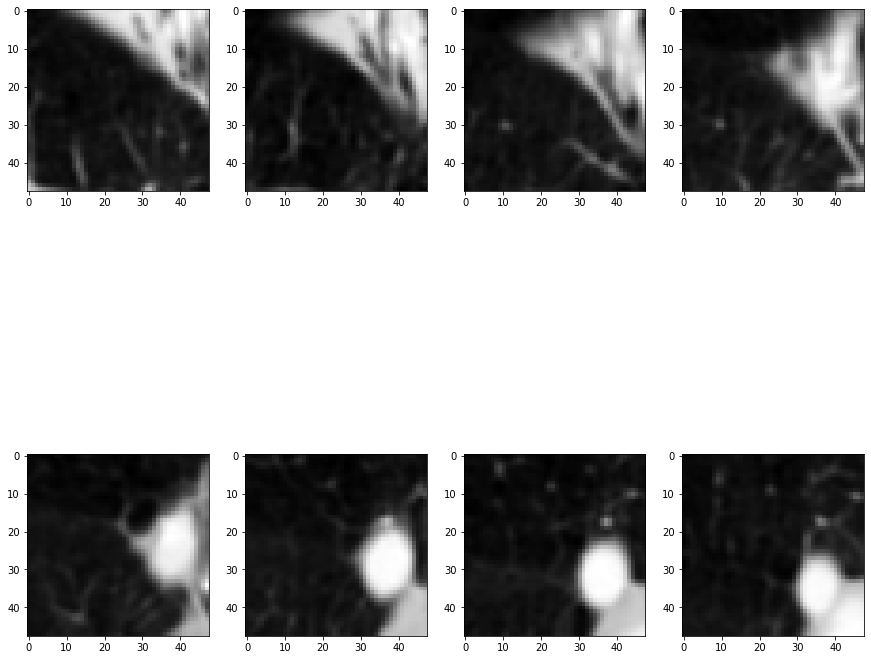

In [ ]:
slice_index = 0
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 15))
for col in range(0, 4):
  ax[0, col].imshow(candidate_img[slice_index], cmap='gray')
  ax[1, col].imshow(candidate_img[slice_index + 4], cmap='gray')
  slice_index += 1
  